In [ ]:
pip install tensorflow


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load synthetic dataset
data = pd.read_csv('/content/eeg_alz_dataset.csv')

# Split features and labels
X = data.drop(columns=["Label"])
y = data["Label"]

# Normalize features
scalera = StandardScaler()
X_scaled = scalera.fit_transform(X)

n_f = 2.0
X_n = X_scaled + n_f * np.random.normal(loc=0.0, scale=1.0, size=X_scaled.shape)
X_n = StandardScaler().fit_transform(X_n)

# Determine timesteps and features for LSTM
num_timesteps = 5
total_features = X_n.shape[1]

if total_features % num_timesteps == 0:
    num_features = total_features // num_timesteps
    X_reshaped_n = X_n.reshape(-1, num_timesteps, num_features)
else:
    truncated_features = (total_features // num_timesteps) * num_timesteps
    X_truncated = X_n[:, :truncated_features]
    num_features = truncated_features // num_timesteps
    X_reshaped_n = X_truncated.reshape(-1, num_timesteps, num_features)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_reshaped_n, y, test_size=0.2, random_state=42, stratify=y
)

# Define a simpler LSTM model
lstm_amodel = Sequential([
    LSTM(32, return_sequences=True, input_shape=(num_timesteps, num_features)),
    Dropout(0.5),
    LSTM(16),
    Dropout(0.5),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
lstm_amodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Train the model
history = lstm_amodel.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model
test_loss, test_accuracy = lstm_amodel.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.6367 - loss: 0.6741 - val_accuracy: 0.8475 - val_loss: 0.5176
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8399 - loss: 0.4817 - val_accuracy: 0.8400 - val_loss: 0.3723
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8274 - loss: 0.4210 - val_accuracy: 0.8350 - val_loss: 0.3454
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8396 - loss: 0.4005 - val_accuracy: 0.8375 - val_loss: 0.3323
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8466 - loss: 0.3626 - val_accuracy: 0.8450 - val_loss: 0.3201
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8362 - loss: 0.3532 - val_accuracy: 0.8500 - val_loss: 0.3170
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8517 - loss: 0.3715 - val_accuracy: 0.8525 - val_loss: 0.3186
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8487 - loss: 0.3647 - val_accuracy: 0.8500 - val_loss

In [ ]:
import joblib
import tensorflow as tf

# Save the LSTM model in H5 format
lstm_amodel.save("lstm_model.h5")  # Save the model to a file

# Save the scaler using joblib
joblib.dump(scalera, "scaler.pkl")  # Save the scaler to a file

print("Model and scaler have been saved successfully.")


Model and scaler have been saved successfully.


In [ ]:
import joblib
import tensorflow as tf

# Load the LSTM model
model = tf.keras.models.load_model("lstm_model.h5")

# Load the scaler
scaler = joblib.load("scaler.pkl")

print("Model and scaler have been loaded successfully.")


Model and scaler have been loaded successfully.


In [ ]:
pip install dash plotly pandas numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 20.6 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [ ]:
pip install joblib dash plotly numpy pandas

In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State
import plotly.graph_objs as go
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from collections import deque
import joblib

# Load pre-trained LSTM model
model = tf.keras.models.load_model("/content/lstm_model.h5")  # Replace with the actual path
scaler = joblib.load("scaler.pkl")  # Load the scaler used for feature scaling

# Initialize Dash app
app = dash.Dash(__name__)
app.title = "Alzheimer's Prediction Dashboard"

# Initialize rolling data buffers for real-time prediction visualization
time_window = 50
time_series = deque(maxlen=time_window)
prediction_probabilities = deque(maxlen=time_window)
labels = deque(maxlen=time_window)

# Fill with initial data
for i in range(time_window):
    time_series.append(i)
    prediction_probabilities.append(0.5)  # Neutral probability
    labels.append("Low Risk")

# App layout
app.layout = html.Div([
    html.H1("Alzheimer's Prediction Dashboard", style={'text-align': 'center'}),

    # Model performance section
    html.Div([
        html.H3("Model Performance Metrics"),
        dcc.Graph(id="loss-accuracy-graph", style={'height': '40vh'})
    ]),

    # Prediction visualization
    html.Div([
        html.H3("Real-Time Alzheimer's Risk Prediction"),
        dcc.Graph(id="real-time-prediction", style={'height': '40vh'}),
        html.Div([
            html.Div("Current Risk Level:", style={'font-size': '20px'}),
            html.Div(id="current-risk", style={
                'font-size': '30px',
                'text-align': 'center',
                'padding': '10px',
                'color': 'white',
                'background-color': 'gray',
                'border-radius': '10px',
                'margin-top': '10px'
            })
        ], style={'text-align': 'center'})
    ]),

    # Data upload for predictions
    html.Div([
        html.H3("Upload Test Data for Predictions"),
        dcc.Upload(
            id="upload-data",
            children=html.Div(["Drag and Drop or ", html.A("Select Files")]),
            style={
                'width': '100%',
                'height': '60px',
                'lineHeight': '60px',
                'borderWidth': '1px',
                'borderStyle': 'dashed',
                'borderRadius': '5px',
                'textAlign': 'center',
                'margin': '10px'
            },
            multiple=False
        ),
        html.Div(id="upload-status", style={'margin-top': '10px', 'text-align': 'center'})
    ]),

    # Real-time updates
    dcc.Interval(id="update-interval", interval=2000, n_intervals=0)  # Every 2 seconds
])

# Callback to update real-time predictions
@app.callback(
    [Output("real-time-prediction", "figure"),
     Output("current-risk", "children"),
     Output("current-risk", "style")],
    [Input("update-interval", "n_intervals")]
)
def update_real_time_predictions(n):
    # Generate synthetic real-time data for visualization
    num_features = model.input_shape[-1] * model.input_shape[1]
    test_data = np.random.uniform(-1, 1, size=(1, num_features))
    test_data = test_data.reshape(1, model.input_shape[1], model.input_shape[2])

    # Predict Alzheimer's risk
    prob = model.predict(test_data)[0][0]
    risk_level = "High Risk" if prob > 0.5 else "Low Risk"

    # Update buffers
    time_series.append(time_series[-1] + 1)
    prediction_probabilities.append(prob)
    labels.append(risk_level)

    # Color map for risk level
    risk_color = "red" if risk_level == "High Risk" else "green"

    # Create real-time prediction figure
    prediction_figure = {
        "data": [
            go.Scatter(
                x=list(time_series),
                y=list(prediction_probabilities),
                mode="lines",
                name="Risk Probability",
                line=dict(color="blue")
            )
        ],
        "layout": go.Layout(
            title="Real-Time Prediction",
            xaxis={"title": "Time"},
            yaxis={"title": "Probability of Alzheimer's Risk"},
            yaxis_range=[0, 1],
            showlegend=True
        )
    }

    # Update risk style
    risk_style = {
        'font-size': '30px',
        'text-align': 'center',
        'padding': '10px',
        'color': 'white',
        'background-color': risk_color,
        'border-radius': '10px',
        'margin-top': '10px'
    }

    return prediction_figure, risk_level, risk_style

# Callback to handle uploaded data
@app.callback(
    Output("upload-status", "children"),
    [Input("upload-data", "contents")],
    [State("upload-data", "filename"), State("upload-data", "last_modified")]
)
def handle_uploaded_data(contents, filename, last_modified):
    if contents is None:
        return "No file uploaded yet."

    # Process uploaded data (for simplicity, this example doesn't process files)
    return f"File '{filename}' uploaded successfully!"

# Placeholder for loss/accuracy visualization
@app.callback(
    Output("loss-accuracy-graph", "figure"),
    [Input("update-interval", "n_intervals")]
)
def display_loss_accuracy(n):
    # Simulate training loss and accuracy for visualization
    epochs = np.arange(1, 11)
    loss = np.random.uniform(0.1, 0.5, size=10)
    accuracy = np.random.uniform(0.8, 1.0, size=10)

    figure = {
        "data": [
            go.Scatter(x=epochs, y=loss, mode="lines+markers", name="Loss"),
            go.Scatter(x=epochs, y=accuracy, mode="lines+markers", name="Accuracy")
        ],
        "layout": go.Layout(
            title="Training Loss and Accuracy",
            xaxis={"title": "Epochs"},
            yaxis={"title": "Metric Value"},
            showlegend=True
        )
    }
    return figure

# Run the app
if __name__ == "__main__":
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

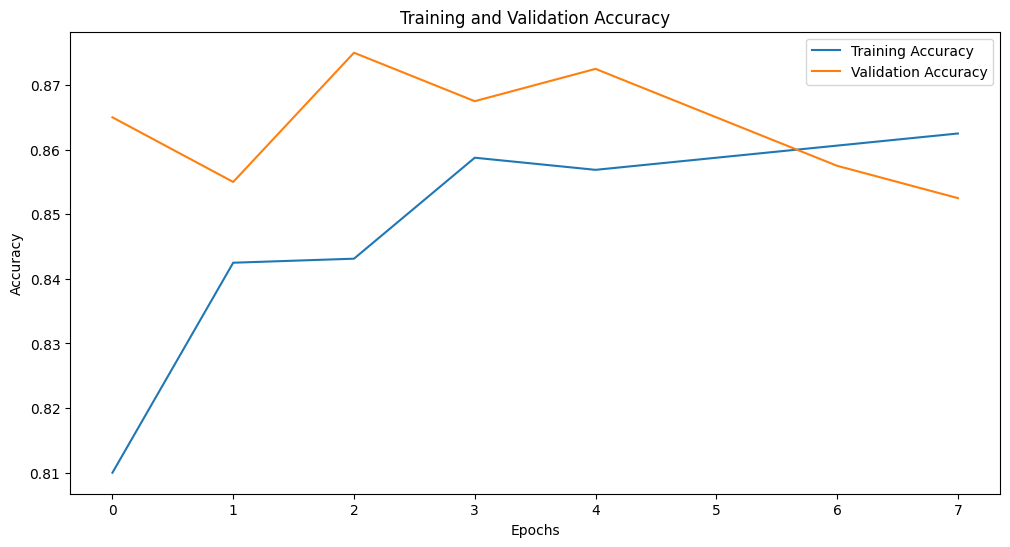

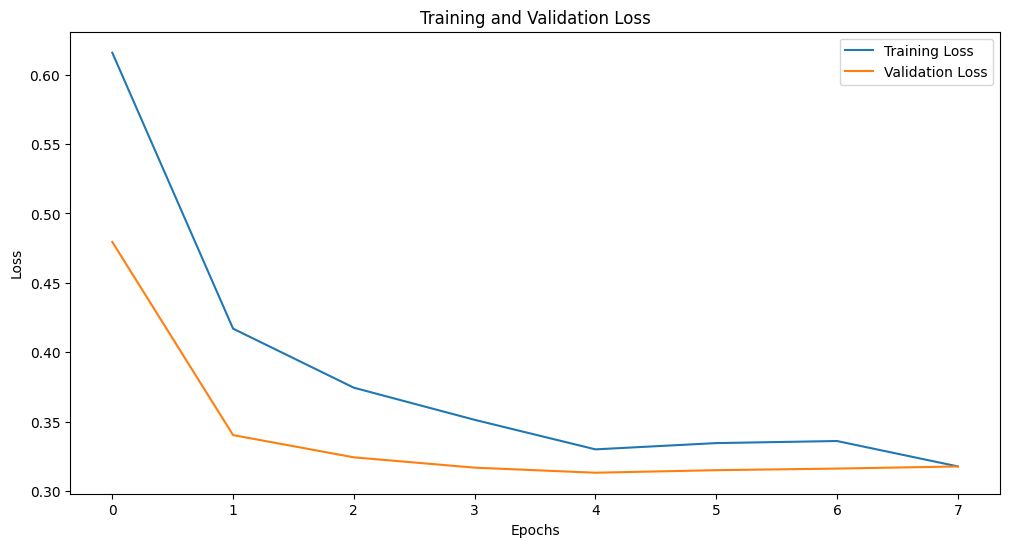

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
